## Задание 1 

1 Задача - ответить на вопрос есть ли связь между жёсткостью воды и средней годовой смертностью?

1. Построить точечный график
1. Рассчитать коэффициенты корреляции Пирсона и Спирмена
1. Построить модель линейной регрессии
1. Рассчитать коэффициент детерминации
1. Вывести график остатков

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, model_selection, metrics

In [3]:
df = pd.read_csv('water.csv')
df.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


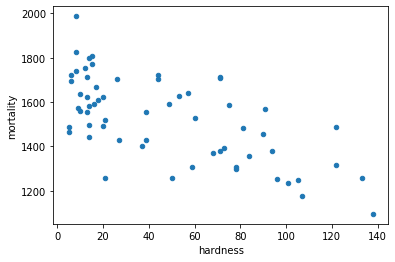

In [43]:
#1
df.plot('hardness', 'mortality', kind='scatter')
plt.show()

In [66]:
#2
print('Spearman:\n', df[['mortality', 'hardness']].corr(method='spearman'), '\n') 
print('Kendall:\n', df[['mortality', 'hardness']].corr(method='kendall'))

Spearman:
            mortality  hardness
mortality   1.000000 -0.631665
hardness   -0.631665  1.000000 

Kendall:
            mortality  hardness
mortality   1.000000 -0.453753
hardness   -0.453753  1.000000


In [21]:
#3
reg = linear_model.LinearRegression()
X_train, X_test, y_train, y_test = model_selection.train_test_split(df[['hardness']], df.mortality, test_size=0.3)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [74]:
reg.intercept_, reg.coef_[0]

(1668.534460639787, -3.109523670516368)

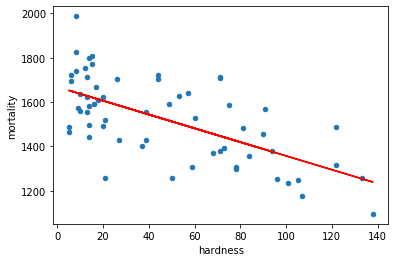

In [42]:
df.plot('hardness', 'mortality', kind='scatter')
plt.plot(X_test, y_pred, c='r') #построили неплохо
plt.show()

In [33]:
#4
print('R2:', metrics.r2_score(y_test, y_pred)) #ну такой себе, ну хоть лучше, чем константный :)

R2: 0.5524326715312525


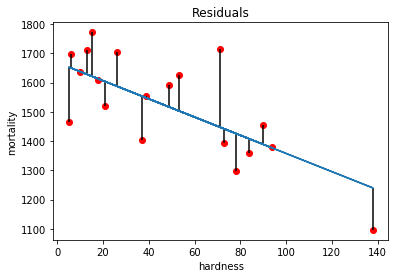

In [41]:
#5
plt.scatter(X_test, y_test, c='r')
plt.plot(X_test, y_pred)
plt.vlines(X_test, y_test, y_pred)
plt.xlabel('hardness')
plt.ylabel('mortality')
plt.title('Residuals')
plt.show()

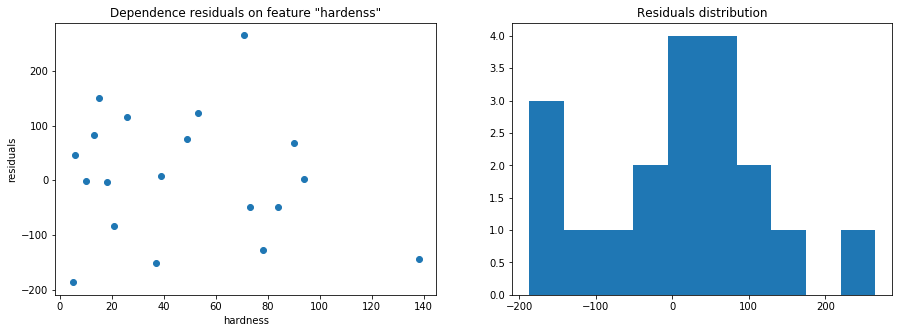

In [51]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

resid = y_test - y_pred
ax[0].scatter(X_test, resid)
ax[0].set_xlabel('hardness')
ax[0].set_ylabel('residuals')
ax[0].set_title('Dependence residuals on feature "hardenss"')
ax[1].hist(resid)
ax[1].set_title('Residuals distribution')
plt.show()
#Распределение остатков имеют тяжелые хвосты, и смещены относительно нуля

## Задание 2

Сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

1. Разделить данные на 2 группы
2. Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

In [58]:
#1
south = df.loc[df.location == 'South']
north = df.loc[df.location == 'North']

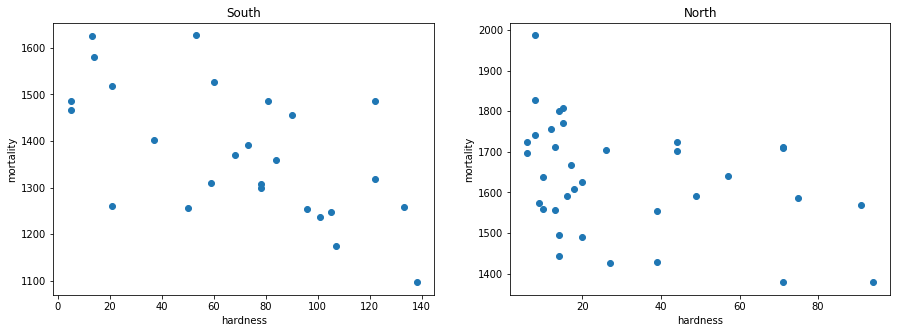

In [67]:
#2.1
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].scatter(south['hardness'], south['mortality'])
ax[0].set_xlabel('hardness')
ax[0].set_ylabel('mortality')
ax[0].set_title('South')
ax[1].scatter(north['hardness'], north['mortality'])
ax[1].set_xlabel('hardness')
ax[1].set_ylabel('mortality')
ax[1].set_title('North')
plt.show()
#Зависимость между признаками угадывается меньше. Этому также способствует уменьшение элементов в выборке для каждой группы

In [73]:
#2.2
print('SOUTH')
print('Spearman:\n', south[['mortality', 'hardness']].corr(method='spearman')) 
print('Kendall:\n', south[['mortality', 'hardness']].corr(method='kendall'), '\n')
print('NORTH')
print('Spearman:\n', north[['mortality', 'hardness']].corr(method='spearman')) 
print('Kendall:\n', north[['mortality', 'hardness']].corr(method='kendall'))
#Для северных городов корреляция признаков уменьшилась

SOUTH
Spearman:
            mortality  hardness
mortality   1.000000 -0.595723
hardness   -0.595723  1.000000
Kendall:
            mortality  hardness
mortality   1.000000 -0.440315
hardness   -0.440315  1.000000 

NORTH
Spearman:
            mortality  hardness
mortality   1.000000 -0.404208
hardness   -0.404208  1.000000
Kendall:
            mortality  hardness
mortality   1.000000 -0.283058
hardness   -0.283058  1.000000


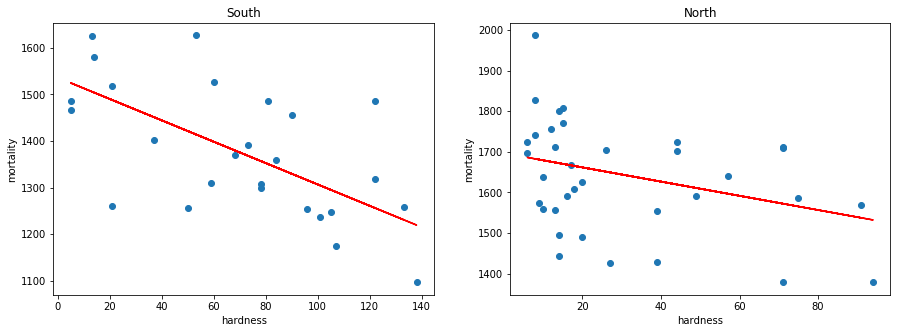

In [89]:
#2.3
#SOUTH
reg_south = linear_model.LinearRegression()
Xs_train, Xs_test, ys_train, ys_test = model_selection.train_test_split(south[['hardness']], south.mortality, test_size=0.3)
reg_south.fit(Xs_train, ys_train)
ys_pred = reg_south.predict(Xs_test)

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].scatter(south['hardness'], south['mortality'])
ys_line = reg_south.coef_[0] * south['hardness'] + reg_south.intercept_
ax[0].plot(south['hardness'], ys_line, c='r')
ax[0].set_xlabel('hardness')
ax[0].set_ylabel('mortality')
ax[0].set_title('South')

#NORTH

reg_north = linear_model.LinearRegression()
Xn_train, Xn_test, yn_train, yn_test = model_selection.train_test_split(north[['hardness']], north.mortality, test_size=0.3)
reg_north.fit(Xn_train, yn_train)
yn_pred = reg_north.predict(Xn_test)

ax[1].scatter(north['hardness'], north['mortality'])
yn_line = reg_north.coef_[0] * north['hardness'] + reg_north.intercept_
ax[1].plot(north['hardness'], yn_line, c='r') 
ax[1].set_xlabel('hardness')
ax[1].set_ylabel('mortality')
ax[1].set_title('North')
plt.show()
#Уравнение прямой, построенное моделью для юных городов выглядит более првдоподно (лучше подходит), нежели для северных

In [91]:
#2.4
print('South R2:', metrics.r2_score(ys_test, ys_pred))
print('North R2:', metrics.r2_score(yn_test, yn_pred)) 
#И опять же, модель, построенная для южных городов, лучше улавливает особенности и разброс данных, но в целом, коэффициент снизился 
#для обеих групп в сравнении с генеральной совокупностью

South R2: 0.26782616847892415
North R2: 0.16212704116716914


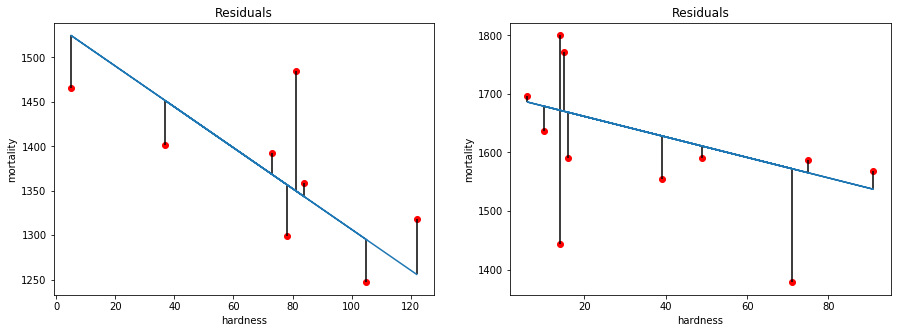

In [93]:
#2.5
#SOUTH
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].scatter(Xs_test, ys_test, c='r')
ax[0].plot(Xs_test, ys_pred)
ax[0].vlines(Xs_test, ys_test, ys_pred)
ax[0].set_xlabel('hardness')
ax[0].set_ylabel('mortality')
ax[0].set_title('Residuals')
#NORTH
ax[1].scatter(Xn_test, yn_test, c='r')
ax[1].plot(Xn_test, yn_pred)
ax[1].vlines(Xn_test, yn_test, yn_pred)
ax[1].set_xlabel('hardness')
ax[1].set_ylabel('mortality')
ax[1].set_title('Residuals')
plt.show()

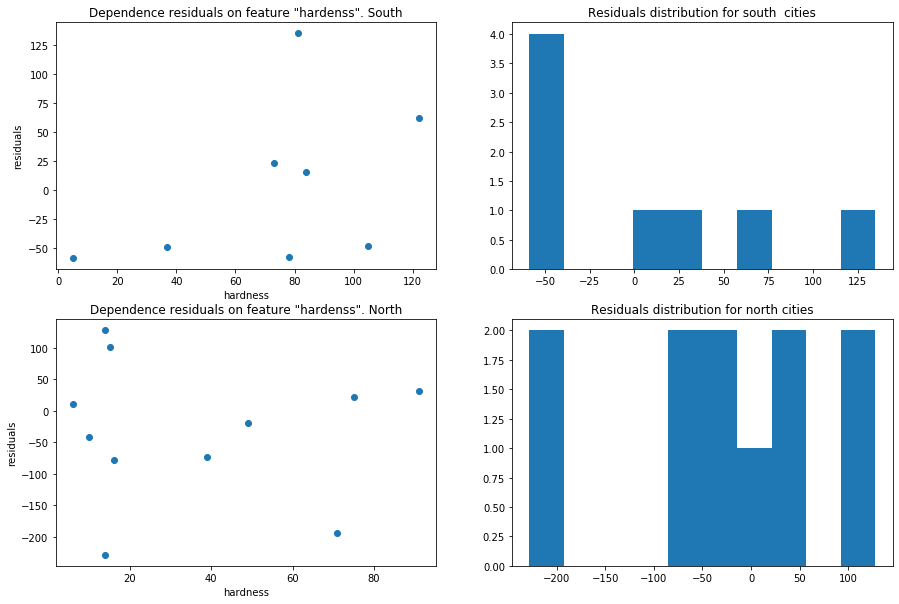

In [99]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
#SOUTH
resid_s = ys_test - ys_pred
ax[0, 0].scatter(Xs_test, resid_s)
ax[0, 0].set_xlabel('hardness')
ax[0, 0].set_ylabel('residuals')
ax[0, 0].set_title('Dependence residuals on feature "hardenss". South')
ax[0, 1].hist(resid_s)
ax[0, 1].set_title('Residuals distribution for south  cities')
#NORTH
resid_n = yn_test - yn_pred
ax[1, 0].scatter(Xn_test, resid_n)
ax[1, 0].set_xlabel('hardness')
ax[1, 0].set_ylabel('residuals')
ax[1, 0].set_title('Dependence residuals on feature "hardenss". North')
ax[1, 1].hist(resid_n)
ax[1, 1].set_title('Residuals distribution for north cities')
plt.show()

#Сразу видно, что остатки для северных районов имеет более хаотичный характер, хотя их распределение вряд ли можно назвать нормальным.